## Import Libraries

In [901]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load and Inspect Data

In [902]:
netflix_df_raw = pd.read_csv('/Users/naregkedjejian/Downloads/netflix_opening_week_dataset.csv', header=0, parse_dates=[1])
netflix_dictionary = pd.read_csv('/Users/naregkedjejian/Downloads/netflix_opening_week_data_dictionary.csv', header=0, index_col=0)
netflix_df = netflix_df_raw.copy()

In [903]:
netflix_df.head()

,title,release_date,day_of_week_release,month,season_number,num_episodes,episode_duration_min,runtime_total_min,is_ip,is_limited_series,...,availability_dubbed_count,availability_subtitle_count,competition_titles_in_window,holiday_window,critic_score,audience_score,synopsis_length_words,title_length_chars,release_timing_index,opening_week_member_hours_mm
0,Quantum Echo Dreams,2025-03-21,Fri,3,3,6,57,342,0,1,...,12.0,14.0,10,0,62.0,53.0,86,19,1.10,37.86
1,Broken Orbit Heist,2023-02-11,Sat,2,1,7,40,280,1,0,...,7.0,16.0,9,0,56.0,62.0,41,18,1.03,44.46
2,Quantum Gate Protocol,2023-07-03,Mon,7,1,6,45,270,0,1,...,7.0,25.0,8,0,45.0,37.0,58,21,1.02,30.09
3,Electric Horizon Files,2024-11-26,Tue,11,1,10,68,680,0,0,...,10.0,15.0,6,1,67.0,64.0,179,22,1.07,40.77
4,Neon Odyssey Station,2022-10-22,Sat,10,4,13,35,455,1,0,...,1.0,13.0,5,0,74.0,79.0,125,20,1.08,51.68


In [904]:
netflix_df.shape

(2525, 32)

In [905]:
netflix_df.dtypes

title                                   object
release_date                    datetime64[ns]
day_of_week_release                     object
month                                    int64
season_number                            int64
num_episodes                             int64
episode_duration_min                     int64
runtime_total_min                        int64
is_ip                                    int64
is_limited_series                        int64
is_continuation                          int64
primary_genre                           object
maturity_rating                         object
language_original                       object
country_cluster                         object
cast_star_power_mm                     float64
pre_release_search_index               float64
social_buzz_volume                     float64
trailer_impressions_mm                 float64
marketing_spend_usd                     object
homepage_hero_share                    float64
email_push_re

In [906]:
netflix_df.dtypes.value_counts()

int64             12
float64           12
object             7
datetime64[ns]     1
Name: count, dtype: int64

In [907]:
netflix_df.describe()

,release_date,month,season_number,num_episodes,episode_duration_min,runtime_total_min,is_ip,is_limited_series,is_continuation,cast_star_power_mm,...,availability_dubbed_count,availability_subtitle_count,competition_titles_in_window,holiday_window,critic_score,audience_score,synopsis_length_words,title_length_chars,release_timing_index,opening_week_member_hours_mm
count,2525,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2415.000000,...,2441.000000,2454.000000,2525.000000,2525.000000,2339.000000,2317.000000,2525.000000,2525.000000,2525.000000,2525.000000
mean,2022-05-08 22:47:34.336633600,6.409109,1.684752,8.102574,45.181782,357.925545,0.310099,0.147723,0.374257,4.273524,...,6.443261,19.461288,5.505347,0.166337,65.314664,65.149763,114.044356,19.240000,1.048127,33.129865
min,2019-01-02 00:00:00,1.000000,1.000000,1.000000,15.000000,44.000000,0.000000,0.000000,0.000000,0.330000,...,0.000000,10.000000,0.000000,0.000000,18.000000,10.000000,30.000000,9.000000,0.940000,5.440000
25%,2020-09-18 00:00:00,3.000000,1.000000,7.000000,38.000000,276.000000,0.000000,0.000000,0.000000,2.080000,...,3.000000,14.000000,3.000000,0.000000,55.000000,53.000000,70.000000,18.000000,1.010000,26.610000
50%,2022-05-05 00:00:00,6.000000,1.000000,8.000000,46.000000,350.000000,0.000000,0.000000,0.000000,3.330000,...,6.000000,20.000000,5.000000,0.000000,65.000000,65.000000,114.000000,19.000000,1.050000,32.900000
75%,2024-01-06 00:00:00,9.000000,2.000000,10.000000,53.000000,440.000000,1.000000,0.000000,1.000000,5.465000,...,10.000000,24.000000,9.000000,0.000000,76.000000,77.000000,157.000000,21.000000,1.090000,39.400000
max,2025-07-30 00:00:00,12.000000,5.000000,13.000000,80.000000,800.000000,1.000000,1.000000,1.000000,39.820000,...,13.000000,29.000000,11.000000,1.000000,98.000000,100.000000,199.000000,27.000000,1.200000,94.740000
std,NaN,3.456338,1.068024,2.126584,11.698429,118.913301,0.462626,0.354895,0.484026,3.418610,...,4.003400,5.850698,3.446741,0.372456,14.648234,17.509004,49.447090,2.707371,0.056291,9.399201


## Data Cleaning

### 1. Drop Duplicates

In [908]:
netflix_df.duplicated().sum()

25

In [909]:
netflix_df.drop_duplicates(inplace=True)

### 2. Fixing Data Types

In [910]:
netflix_df.select_dtypes(include="object").head()

,title,day_of_week_release,primary_genre,maturity_rating,language_original,country_cluster,marketing_spend_usd
0,Quantum Echo Dreams,Fri,Action,PG,English,JP,1301388.0
1,Broken Orbit Heist,Sat,Drama,TV-14,English,IN,642881.0
2,Quantum Gate Protocol,Mon,Comedy,TV-14,English,US,1114720.0
3,Electric Horizon Files,Tue,Sci-Fi,TV-MA,English,UK,410404.0
4,Neon Odyssey Station,Sat,Reality,TV-14,Spanish,AR,"$9,001,093"


In [911]:
netflix_df["marketing_spend_usd"] = netflix_df["marketing_spend_usd"].str.replace('$', '', regex=False)
netflix_df["marketing_spend_usd"] = netflix_df["marketing_spend_usd"].str.replace(',', '', regex=False)
netflix_df["marketing_spend_usd"] = netflix_df["marketing_spend_usd"].astype("float")

### 3. String Cleaning

In [912]:
netflix_df.select_dtypes(include="object").iloc[:,1].value_counts()

day_of_week_release
Mon    382
Sat    371
Wed    363
Thu    360
Tue    348
Fri    338
Sun    338
Name: count, dtype: int64

In [913]:
netflix_df.select_dtypes(include="object").iloc[:,2].value_counts()

primary_genre
Comedy         478
Drama          473
Action         261
Reality        239
Sci-Fi         179
Kids           147
Documentary    144
Romance        124
Thriller       122
Anime          114
Fantasy         67
Crime           41
comedy          16
drama           15
reality          8
action           8
kids             5
sci-fi           5
documentary      3
thriller         3
romance          3
fantasy          2
anime            1
Name: count, dtype: int64

In [914]:
netflix_df["primary_genre"] = netflix_df["primary_genre"].str.lower()

In [915]:
netflix_df.select_dtypes(include="object").iloc[:,3].value_counts()

maturity_rating
TV-MA    677
TV-14    648
TV-PG    427
TV-Y7    206
PG-13    151
R        126
PG       114
TV-Y      50
tv-ma     20
tv-14     18
pg-13      8
tv-y7      5
tv-pg      5
r          4
pg         3
tv-y       1
Name: count, dtype: int64

In [916]:
netflix_df["maturity_rating"] = netflix_df["maturity_rating"].str.upper()

In [917]:
netflix_df["maturity_rating"] = netflix_df["maturity_rating"].str.replace("PG-13","TV-14")
netflix_df["maturity_rating"] = netflix_df["maturity_rating"].str.replace("TV-PG", "PG")
netflix_df["maturity_rating"] = netflix_df["maturity_rating"].str.replace("PG","TV-PG")
netflix_df["maturity_rating"] = netflix_df["maturity_rating"].str.replace("R","TV-MA")

In [918]:
netflix_df["maturity_rating"].value_counts()

maturity_rating
TV-MA    827
TV-14    825
TV-PG    549
TV-Y7    211
TV-Y      51
Name: count, dtype: int64

In [919]:
netflix_df.select_dtypes(include="object").iloc[:,4].value_counts()

language_original
English       1294
Spanish        278
Korean         188
Hindi          162
Japanese       159
French         101
German          82
Portuguese      66
Turkish         42
english         33
Italian         24
korean          10
spanish         10
hindi            4
turkish          2
french           1
italian          1
Name: count, dtype: int64

In [920]:
netflix_df["language_original"] = netflix_df["language_original"].str.lower()

In [921]:
netflix_df.select_dtypes(include="object").iloc[:,5].value_counts()

country_cluster
US    1050
UK     176
KR     165
BR     148
IN     142
JP     134
CA     127
MX     117
DE      76
TR      74
ES      59
us      48
FR      37
AU      29
AR      29
br       9
in       6
fr       5
ca       4
uk       4
kr       3
ar       3
jp       3
mx       3
tr       2
de       1
es       1
Name: count, dtype: int64

In [922]:
netflix_df["country_cluster"] = netflix_df["country_cluster"].str.upper()

### 4. Number Cleaning

In [923]:
netflix_df_num = netflix_df.select_dtypes(include="number")
netflix_df_num

,month,season_number,num_episodes,episode_duration_min,runtime_total_min,is_ip,is_limited_series,is_continuation,cast_star_power_mm,pre_release_search_index,...,availability_dubbed_count,availability_subtitle_count,competition_titles_in_window,holiday_window,critic_score,audience_score,synopsis_length_words,title_length_chars,release_timing_index,opening_week_member_hours_mm
0,3,3,6,57,342,0,1,1,4.51,27.0,...,12.0,14.0,10,0,62.0,53.0,86,19,1.10,37.86
1,2,1,7,40,280,1,0,0,1.61,13.0,...,7.0,16.0,9,0,56.0,62.0,41,18,1.03,44.46
2,7,1,6,45,270,0,1,0,3.80,49.0,...,7.0,25.0,8,0,45.0,37.0,58,21,1.02,30.09
3,11,1,10,68,680,0,0,0,1.58,68.0,...,10.0,15.0,6,1,67.0,64.0,179,22,1.07,40.77
4,10,4,13,35,455,1,0,1,7.21,47.0,...,1.0,13.0,5,0,74.0,79.0,125,20,1.08,51.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,1,7,41,287,0,0,0,1.08,NaN,...,9.0,26.0,8,0,NaN,43.0,102,18,0.98,24.00
2496,7,2,9,36,324,0,0,1,3.16,78.0,...,2.0,10.0,6,0,72.0,70.0,32,17,1.02,33.18
2497,4,1,10,57,570,0,1,0,2.90,68.0,...,2.0,18.0,1,0,18.0,10.0,77,17,0.99,27.71
2498,8,2,6,30,180,0,0,1,1.81,33.0,...,9.0,18.0,3,0,50.0,48.0,57,23,1.08,33.36


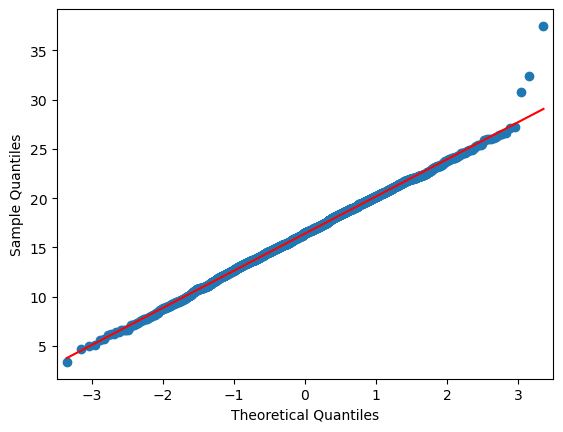

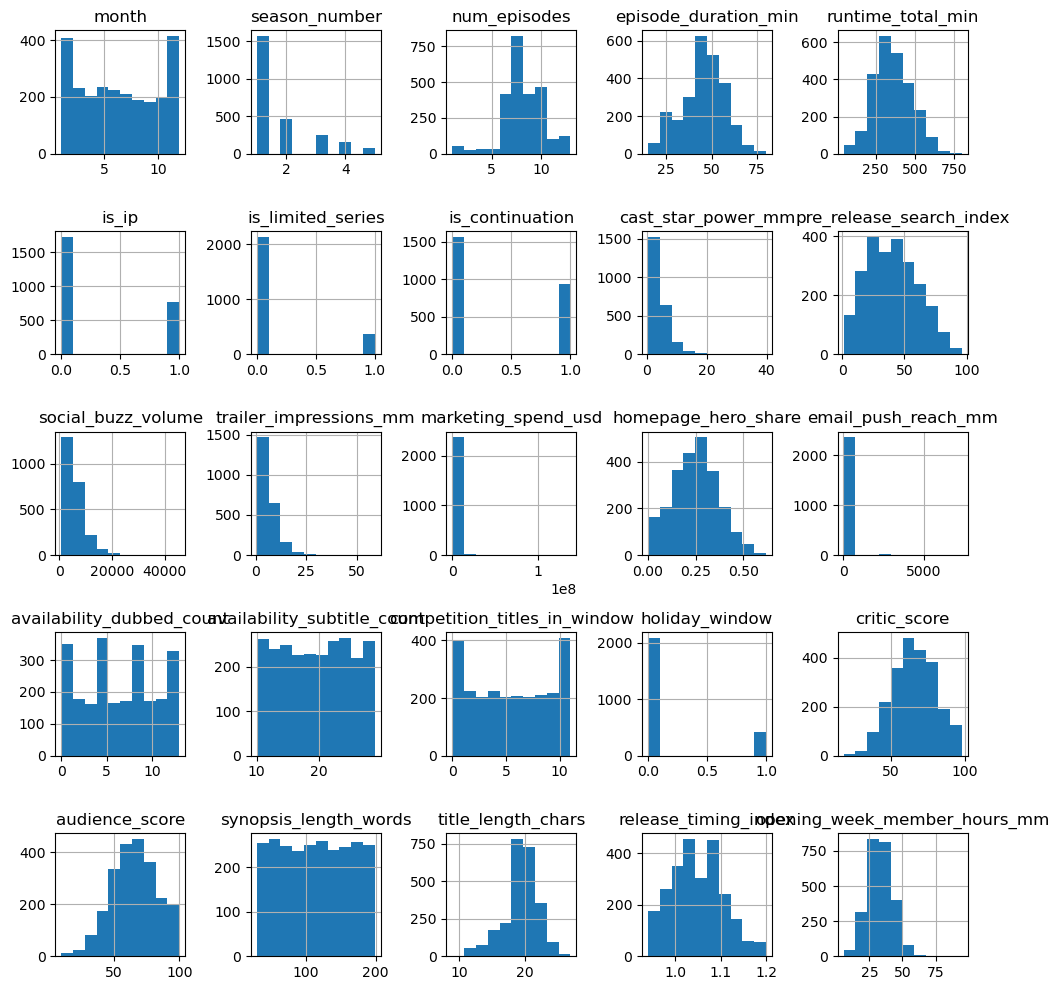

In [924]:
netflix_df_num.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [925]:
netflix_df[["cast_star_power_mm", "email_push_reach_mm", "marketing_spend_usd"]].describe()

,cast_star_power_mm,email_push_reach_mm,marketing_spend_usd
count,2391.000000,2395.000000,2.399000e+03
mean,4.266437,53.101090,3.091770e+06
std,3.416974,422.370485,4.531018e+06
min,0.330000,0.350000,9.844100e+04
25%,2.075000,1.800000,1.099547e+06
50%,3.330000,2.550000,2.022117e+06
75%,5.460000,3.635000,3.669062e+06
max,39.820000,7350.000000,1.381922e+08


In [926]:
netflix_df[(netflix_df["email_push_reach_mm"] > 11)][["email_push_reach_mm"]].sort_values(
    by = "email_push_reach_mm", ascending=False)

,email_push_reach_mm
2476,7350.0
2046,6740.0
538,5740.0
36,5270.0
2162,5210.0
1971,4640.0
637,4210.0
1067,3760.0
1359,3540.0
1985,3540.0


All these values need to be divided by 1000.

In [927]:
netflix_df.loc[netflix_df["email_push_reach_mm"] > 11, "email_push_reach_mm"] = netflix_df.loc[netflix_df["email_push_reach_mm"] > 11, "email_push_reach_mm"]/1000

### 5. Outliers

In [928]:
from scipy.stats import zscore
# Calculate z-scores of features
z_scores = np.abs(zscore(netflix_df_num.drop("opening_week_member_hours_mm", axis=1)))
# Identify rows where any feature has z-score > 3 (outside of 99.7% of values)
outliers = (z_scores > 3).any(axis=1)
print(f"There are {(z_scores > 3).any(axis=1).sum()} outliers.")

There are 137 outliers.


### 6. Missing Values

In [929]:
netflix_df_clean = netflix_df.copy()

In [930]:
netflix_df_clean.isnull().sum().sort_values(ascending=False)

audience_score                  202
critic_score                    184
trailer_impressions_mm          146
pre_release_search_index        137
social_buzz_volume              112
cast_star_power_mm              109
homepage_hero_share             105
email_push_reach_mm             105
marketing_spend_usd             101
availability_dubbed_count        83
availability_subtitle_count      71
country_cluster                  45
language_original                43
primary_genre                    42
maturity_rating                  37
competition_titles_in_window      0
holiday_window                    0
synopsis_length_words             0
title_length_chars                0
release_timing_index              0
title                             0
release_date                      0
is_continuation                   0
is_limited_series                 0
is_ip                             0
runtime_total_min                 0
episode_duration_min              0
num_episodes                

In [931]:
print(f"Number of rows with missing values: {netflix_df_clean.isnull().any(axis=1).sum()}")

Number of rows with missing values: 1139


In [932]:
netflix_df_clean[['audience_score', 'critic_score']].corr()

,audience_score,critic_score
audience_score,1.000000,0.820066
critic_score,0.820066,1.000000


Since `audience_score` and `critic_score` are highly correlated numeric variables, an iterative regression-based imputation will be used to fill the missing values.

In [933]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)
netflix_df_clean[['audience_score', 'critic_score']] = imputer.fit_transform(netflix_df_clean[['audience_score', 'critic_score']])

The missing data for the variables `language_original`, `primary_genre`, `maturity_rating`, and `country_cluster` will be filled with the value "unknown".

In [934]:
netflix_df_clean[["language_original", "primary_genre", "maturity_rating", "country_cluster"]] = netflix_df_clean[["language_original", "primary_genre", "maturity_rating", "country_cluster"]].fillna("unknown")

In [935]:
print(shapiro(np.log(netflix_df_clean["trailer_impressions_mm"].dropna())))
print(shapiro(np.log(netflix_df_clean["social_buzz_volume"].dropna())))
print(shapiro(np.log(netflix_df_clean["cast_star_power_mm"].dropna())))
print(shapiro(np.log(netflix_df_clean["email_push_reach_mm"].dropna())))
print(shapiro(np.log(netflix_df_clean["marketing_spend_usd"].dropna())))

ShapiroResult(statistic=0.9991039560729936, pvalue=0.29649947424946643)
ShapiroResult(statistic=0.9991337849145988, pvalue=0.31511313921111705)
ShapiroResult(statistic=0.9993299561150267, pvalue=0.5687091131272556)
ShapiroResult(statistic=0.9991326848161939, pvalue=0.3115336056508356)
ShapiroResult(statistic=0.9988610561731115, pvalue=0.1164277909461484)


Since the variables `trailer_impressions_mm`, `social_buzz_volume`, `cast_star_power_mm`, `email_push_reach_mm`, and `marketing_spend_usd` are log-normal, distribution-based imputation will be used.

In [936]:
from scipy import stats

def distribution_impute(df, columns, dist='norm'):
    """
       Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (str or list): Column name or list of column names to impute.
        dist (str or dict): A single distribution name or a dict mapping column names to distribution names.
    """
    # Handle single-column input
    if isinstance(columns, str):
        columns = [columns]

    for col in columns:
        observed = df[col].dropna()
        
        # Determine distribution to use for this column
        dist_name = dist[col] if isinstance(dist, dict) else dist
        
        try:
            dist_obj = getattr(stats, dist_name)
        except AttributeError:
            raise ValueError(f"'{dist_name}' is not a valid scipy.stats distribution")
        
        # Fit and sample
        params = dist_obj.fit(observed)
        n_missing = df[col].isna().sum()
        samples = dist_obj.rvs(*params, size=n_missing)
        df.loc[df[col].isna(), col] = samples

In [937]:
distribution_impute(netflix_df_clean, ["trailer_impressions_mm", "social_buzz_volume", "cast_star_power_mm", "email_push_reach_mm", "marketing_spend_usd"], dist="lognorm")

Since the variable `availability_subtitle_count` follows a uniform distribution, distribution-based imputation will be used.

In [938]:
distribution_impute(netflix_df_clean, ["availability_subtitle_count"], dist="uniform")

The remaining variables with missing values are `availability_dubbed_count`, `pre_release_search_index`, and `homepage_hero_share`. Since these variables do not follow a well-known distribution, random sample imputation will be used.

In [939]:
def random_sample_impute(df, columns):
    if isinstance(columns, str):
        columns = [columns]

    for column in columns:
        missing = df[column].isnull()
        n_missing = missing.sum()

        if n_missing == 0:
            continue

        observed_values = df.loc[~missing, column]
        if observed_values.empty:
            raise ValueError(f"No non-missing values to sample from in column '{column}'.")

        imputed_values = np.random.choice(observed_values, size=n_missing, replace=True)
        df.loc[missing, column] = imputed_values

In [940]:
random_sample_impute(netflix_df_clean, ["availability_dubbed_count", "pre_release_search_index", "homepage_hero_share"])

In [941]:
netflix_df_clean.isnull().sum().sum()

0

All missing values have been filled.

### 7. Sort Values and Reset Index

In [942]:
netflix_df_clean = netflix_df_clean.sort_values(by='release_date')
netflix_df_clean.reset_index(drop=True, inplace=True)

## Feature Engineering

### 1. One-hot, Ordinal, and Cyclical Encoding

In [943]:
netflix_df_fe = netflix_df_clean.copy()

In [944]:
# Identify nominal categorical columns
nominal_cols = netflix_df_fe[["primary_genre","language_original","country_cluster"]].columns

# One-hot encode nominal categorical columns
netflix_df_fe = pd.get_dummies(netflix_df_fe, columns=nominal_cols, drop_first=True, dtype=int)

In [945]:
# Ordinal encoding for ordered variables
from sklearn.preprocessing import OrdinalEncoder

day_of_week_release_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
maturity_rating_order = ['unknown', 'TV-Y', 'TV-Y7', 'TV-PG', 'TV-14', 'TV-MA']  

ordinal_encoder = OrdinalEncoder(categories=[day_of_week_release_order, maturity_rating_order])
netflix_df_fe[['day_of_week_release', 'maturity_rating']] = ordinal_encoder.fit_transform(netflix_df_fe[['day_of_week_release', 'maturity_rating']])

In [946]:
netflix_df_fe['day_of_week_release'] = netflix_df_fe['day_of_week_release']+1
netflix_df_fe['day_of_week_release'] = netflix_df_fe['day_of_week_release'].astype(int)

In [947]:
# extract year and day column
netflix_df_fe["release_date"] = pd.to_datetime(netflix_df_fe["release_date"])
netflix_df_fe["year"] = netflix_df_fe["release_date"].dt.year
netflix_df_fe["day_of_month"] = netflix_df_fe["release_date"].dt.day

In [948]:
# Cyclical encoding 
netflix_df_fe["month_sin"] = np.sin(2*np.pi * netflix_df_fe['month'] / 12)
netflix_df_fe["month_cos"] = np.cos(2*np.pi * netflix_df_fe['month'] / 12)
netflix_df_fe["day_sin"] = np.sin(2*np.pi * netflix_df_fe['day_of_week_release'] / 7)
netflix_df_fe["day_cos"] = np.cos(2*np.pi * netflix_df_fe['day_of_week_release'] / 7)

In [949]:
netflix_df_fe = netflix_df_fe.drop(['day_of_week_release', 'month'], axis=1)

In [950]:
print(len(netflix_df_fe.columns))
netflix_df_fe.columns

69


Index(['title', 'release_date', 'season_number', 'num_episodes',
       'episode_duration_min', 'runtime_total_min', 'is_ip',
       'is_limited_series', 'is_continuation', 'maturity_rating',
       'cast_star_power_mm', 'pre_release_search_index', 'social_buzz_volume',
       'trailer_impressions_mm', 'marketing_spend_usd', 'homepage_hero_share',
       'email_push_reach_mm', 'availability_dubbed_count',
       'availability_subtitle_count', 'competition_titles_in_window',
       'holiday_window', 'critic_score', 'audience_score',
       'synopsis_length_words', 'title_length_chars', 'release_timing_index',
       'opening_week_member_hours_mm', 'primary_genre_anime',
       'primary_genre_comedy', 'primary_genre_crime',
       'primary_genre_documentary', 'primary_genre_drama',
       'primary_genre_fantasy', 'primary_genre_kids', 'primary_genre_reality',
       'primary_genre_romance', 'primary_genre_sci-fi',
       'primary_genre_thriller', 'primary_genre_unknown',
       'language

### 2. Log Transformations

In [951]:
netflix_df_fe["trailer_impressions_mm"] = np.log(netflix_df_fe["trailer_impressions_mm"])
netflix_df_fe["social_buzz_volume"] = np.log(netflix_df_fe["social_buzz_volume"])
netflix_df_fe["cast_star_power_mm"] = np.log(netflix_df_fe["cast_star_power_mm"])
netflix_df_fe["email_push_reach_mm"] = np.log(netflix_df_fe["email_push_reach_mm"])
netflix_df_fe["marketing_spend_usd"] = np.log(netflix_df_fe["marketing_spend_usd"])

### 3. Box-Cox Transformation

In [952]:
y1 = netflix_df_fe[["opening_week_member_hours_mm", "release_date"]]

In [953]:
y1["opening_week_member_hours_mm"].skew()

0.28584222850759583

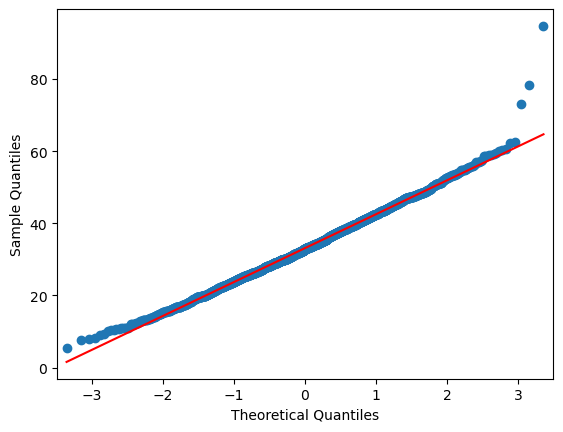

In [954]:
from statsmodels.api import qqplot

qqplot(y1["opening_week_member_hours_mm"], line="s")
#plt.show()

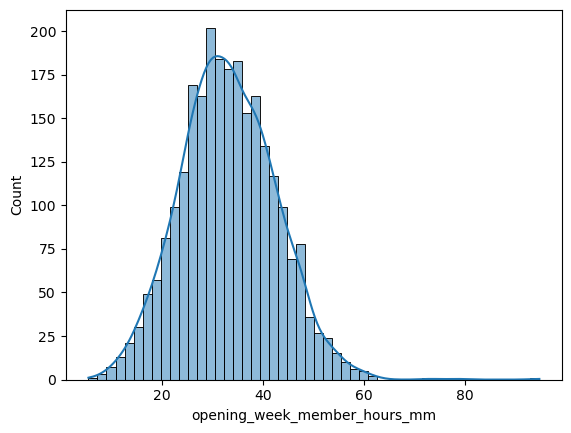

In [979]:
sns.histplot(y1["opening_week_member_hours_mm"], kde=True, bins=50)
plt.show()

There is a slight positive skew, so a boxcox transformation may be helpful. This transformation will be done later when the model is being created.

## Exploratory Data Analysis

### 1. Multicollinearity

In [961]:
# correlation matrix
corr_matrix = netflix_df_fe.corr(numeric_only=True)

# Unstack the matrix into a Series
corr_pairs = corr_matrix.abs().unstack()

# Drop self-correlations (where row == column)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (since correlation is symmetric)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

corr_pairs.head(15)

critic_score          audience_score               0.841714
season_number         is_continuation              0.829417
release_timing_index  day_sin                      0.696740
holiday_window        month_cos                    0.585549
num_episodes          primary_genre_documentary    0.581842
episode_duration_min  runtime_total_min            0.569097
num_episodes          runtime_total_min            0.564304
holiday_window        release_timing_index         0.546190
episode_duration_min  primary_genre_kids           0.463325
runtime_total_min     primary_genre_documentary    0.396011
episode_duration_min  primary_genre_anime          0.394459
num_episodes          episode_duration_min         0.326250
release_timing_index  month_sin                    0.261571
num_episodes          primary_genre_kids           0.252550
country_cluster_UK    country_cluster_US           0.246501
dtype: float64

In [962]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_no_date = netflix_df_fe.drop(["title","opening_week_member_hours_mm", "release_date"], axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = X_no_date.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_date.values, i) for i in range(X_no_date.shape[1])]

In [963]:
vif_data.sort_values(by="VIF",ascending=False).head(20)

,feature,VIF
60,year,5264.206563
23,release_timing_index,4372.726295
1,num_episodes,394.698898
2,episode_duration_min,361.567265
3,runtime_total_min,357.872772
12,marketing_spend_usd,259.797630
10,social_buzz_volume,205.433218
19,critic_score,74.867480
20,audience_score,53.529596
22,title_length_chars,52.879356


Variables with VIFs greater than 10 could potentially cause multicollinearity issues.

### 2. Skewed Features

In [1248]:
from scipy.stats import skew

skew = netflix_df_fe[netflix_df_clean.columns.drop(['day_of_week_release', 'month', 'primary_genre', 'language_original', 'country_cluster'])].select_dtypes(include="number").apply(skew).abs().sort_values(ascending=False)
skew.head(10)

is_limited_series           2.000527
holiday_window              1.799198
season_number               1.546809
maturity_rating             0.952868
is_ip                       0.829738
title_length_chars          0.543516
is_continuation             0.519043
num_episodes                0.494853
release_timing_index        0.329458
pre_release_search_index    0.295745
dtype: float64

No skew issues are present, since the highly skewed features here were initially categorically variables.

## Baseline Test

### Baseline

In [1044]:
X_train_baseline = netflix_df_clean[netflix_df_clean["release_date"].dt.year <= 2023]
X_test_baseline = netflix_df_clean[netflix_df_clean["release_date"].dt.year >= 2025]

In [1048]:
genre_means = X_train_baseline.groupby('primary_genre')['opening_week_member_hours_mm'].mean()
y_pred_baseline_1 = X_test_baseline['primary_genre'].map(genre_means)
y_test_baseline_1 = X_test_baseline['opening_week_member_hours_mm']

In [1073]:
def evaluate(y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 4)
    rmse = round(root_mean_squared_error(y_true, y_pred), 4)
    mape = round(mean_absolute_percentage_error(y_true, y_pred), 4)
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

In [1074]:
evaluate(y_test_baseline_1, y_pred_baseline_1)

{'MAE': 7.889, 'RMSE': 9.7481, 'MAPE': 0.2698}

## Linear Regression Model

In [976]:
X = netflix_df_fe.drop(["title","opening_week_member_hours_mm"], axis=1)
X.head()

,release_date,season_number,num_episodes,episode_duration_min,runtime_total_min,is_ip,is_limited_series,is_continuation,maturity_rating,cast_star_power_mm,...,country_cluster_TR,country_cluster_UK,country_cluster_US,country_cluster_unknown,year,day_of_month,month_sin,month_cos,day_sin,day_cos
0,2019-01-02,1,8,35,280,0,0,0,4.0,0.148420,...,0,0,0,0,2019,2,0.5,0.866025,4.338837e-01,-0.900969
1,2019-01-06,1,9,25,225,0,0,0,4.0,0.993252,...,0,0,1,0,2019,6,0.5,0.866025,-2.449294e-16,1.000000
2,2019-01-08,2,11,27,297,0,0,1,4.0,0.678034,...,0,0,0,0,2019,8,0.5,0.866025,9.749279e-01,-0.222521
3,2019-01-08,1,9,28,252,1,1,0,2.0,1.071584,...,0,0,1,0,2019,8,0.5,0.866025,9.749279e-01,-0.222521
4,2019-01-09,4,2,56,112,0,0,1,4.0,1.916923,...,0,0,1,0,2019,9,0.5,0.866025,4.338837e-01,-0.900969


In [983]:
y = y1.copy()
y.head()

,opening_week_member_hours_mm,release_date
0,17.74,2019-01-02
1,15.81,2019-01-06
2,27.95,2019-01-08
3,38.06,2019-01-08
4,26.70,2019-01-09


### Train Test Split

In [967]:
X_train = X[X["year"] <= 2023].drop("release_date", axis=1)
X_valid = X[X["year"] == 2024].drop("release_date", axis=1)
X_test  = X[X["year"] >= 2025].drop("release_date", axis=1)

In [984]:
y_train = y[y["release_date"].dt.year <= 2023].drop("release_date", axis=1)
y_valid = y[y["release_date"].dt.year == 2024].drop("release_date", axis=1)
y_test = y[y["release_date"].dt.year >= 2025].drop("release_date", axis=1)
y_train = y_train["opening_week_member_hours_mm"]
y_valid = y_valid["opening_week_member_hours_mm"]
y_test = y_test["opening_week_member_hours_mm"]

### Standardize the X training data

In [897]:
from sklearn.preprocessing import StandardScaler

#already implemented in pipeline
#s = StandardScaler()
#X_train_s = s.fit_transform(X_train)

### Box-Cox transformation on y training data

In [985]:
from scipy.stats import boxcox
y_train_bc, lambda_optimal = boxcox(y_train)
y_train_bc = pd.Series(y_train_bc)
print(lambda_optimal)

0.6865189509724559


In [988]:
y_train_bc.head()

0     9.033432
1     8.235901
2    12.875679
3    16.259522
4    12.432488
dtype: float64

### Cross Validation and Hyperparameter Tuning

In [1008]:
# Create pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())  # Placeholder, will be overridden by param_grid
])
# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)

params = [
    {
        "poly_features__degree": [1, 2],
        "model": [LinearRegression()]
        # No hyperparameters to tune for LinearRegression
    },
    {
        "poly_features__degree": [1, 2],
        "model": [Ridge()],
        "model__alpha": np.logspace(-4, 4, 20)
    },
    {
        "poly_features__degree": [1, 2],
        "model": [Lasso(max_iter=100000)],
        "model__alpha": np.logspace(-4, 1, 20)
    },
    {
        "poly_features__degree": [1, 2],
        "model": [ElasticNet(max_iter=100000)],
        "model__alpha": np.logspace(-4, 1, 20),
        "model__l1_ratio": [.1,.5,.9]
    }
]

In [1141]:
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score

scoring = {
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(root_mean_squared_error, greater_is_better=False),
    "MAPE": make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}


In [1009]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=4)
grid = GridSearchCV(pipe, params, cv=tscv, scoring=scoring, refit="RMSE", n_jobs=-1, verbose=2)

### Fit Model on Validation Set

In [1077]:
grid.fit(X_train, y_train_bc)

Fitting 4 folds for each of 202 candidates, totalling 808 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.904e+00, tolerance: 1.126e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.282e+00, tolerance: 1.126e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+00, toler

[CV] END ..model=LinearRegression(), poly_features__degree=2; total time=   0.3s
[CV] END model=Ridge(), model__alpha=0.00026366508987303583, poly_features__degree=1; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.00026366508987303583, poly_features__degree=2; total time=   0.2s
[CV] END model=Ridge(), model__alpha=0.0006951927961775605, poly_features__degree=1; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.0006951927961775605, poly_features__degree=1; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.0006951927961775605, poly_features__degree=1; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.0006951927961775605, poly_features__degree=2; total time=   0.2s
[CV] END model=Ridge(), model__alpha=0.0018329807108324356, poly_features__degree=2; total time=   0.2s
[CV] END model=Ridge(), model__alpha=0.004832930238571752, poly_features__degree=2; total time=   0.3s
[CV] END model=Ridge(), model__alpha=0.03359818286283781, poly_features__degree=1; tot

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearRegression()],
                          'poly_features__degree': [1, 2]},
                         {'model': [Ridge()],
                          'model__alph...
                          'model__l1_ratio': [0.1, 0.5, 0.9],
                          'poly_features__degree': [1, 2]}],
             refit='RMSE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict')},
             verbose=2)

### Cross Validation Scores

In [1083]:
cv_scores = pd.DataFrame(grid.cv_results_)[[
    "mean_test_MAE", "mean_test_RMSE", "mean_test_MAPE", 
    "std_test_MAE", "std_test_RMSE", "std_test_MAPE",
    "params"
]]
cv_scores["model_name"] = cv_scores["params"].apply(lambda p: type(p['model']).__name__)
cv_scores.head()

,mean_test_MAE,mean_test_RMSE,mean_test_MAPE,std_test_MAE,std_test_RMSE,std_test_MAPE,params,model_name
0,-2.273270,-2.913476,-0.174564,0.164295,0.239276,0.013031,"{'model': LinearRegression(), 'poly_features__...",LinearRegression
1,-7.822789,-10.530599,-0.581497,4.054048,5.694143,0.305531,"{'model': LinearRegression(), 'poly_features__...",LinearRegression
2,-2.273269,-2.913476,-0.174564,0.164295,0.239276,0.013031,"{'model': Ridge(), 'model__alpha': 0.0001, 'po...",Ridge
3,-7.820219,-10.515752,-0.581264,4.054491,5.673678,0.305353,"{'model': Ridge(), 'model__alpha': 0.0001, 'po...",Ridge
4,-2.273269,-2.913476,-0.174564,0.164294,0.239275,0.013031,"{'model': Ridge(), 'model__alpha': 0.000263665...",Ridge


In [1200]:
cv_scores.groupby("model_name")[["mean_test_RMSE", "mean_test_MAE", "mean_test_MAPE"]].max().sort_values(by = "mean_test_RMSE", ascending=False)

,mean_test_RMSE,mean_test_MAE,mean_test_MAPE
model_name,,,
Ridge,-2.819375,-2.200275,-0.169547
ElasticNet,-2.821681,-2.198386,-0.171015
Lasso,-2.825762,-2.202494,-0.171745
LinearRegression,-2.913476,-2.273270,-0.174564


In [1079]:
print(grid.best_params_)

{'model': Ridge(), 'model__alpha': 545.5594781168514, 'poly_features__degree': 1}


The best model was Ridge with no polynomial features and an alpha of 545.559.

In [1199]:
cv_scores[cv_scores["params"] == grid.best_params_]

,mean_test_MAE,mean_test_RMSE,mean_test_MAPE,std_test_MAE,std_test_RMSE,std_test_MAPE,params,model_name
34,-2.206036,-2.819375,-0.170932,0.066552,0.11479,0.005651,"{'model': Ridge(), 'model__alpha': 545.5594781...",Ridge


The model performed significantly better than the baseline error measures.

### Model Evaluation on Validation Set

In [1145]:
from scipy.special import inv_boxcox

best_model = grid.best_estimator_

y_pred_bc = best_model.predict(X_valid)
y_pred = inv_boxcox(y_pred_bc, lambda_optimal)

In [1151]:
print("Test error for best model:")
evaluate(y_valid, y_pred)

Test error for best model:


{'MAE': 6.9615, 'RMSE': 8.7629, 'MAPE': 0.257}

In [1150]:
y_pred_train_bc = best_model.predict(X_train)
y_pred_train = inv_boxcox(y_pred_train_bc, lambda_optimal)

print("Training error for best model:")
evaluate(y_train, y_pred_train)

Training error for best model:


{'MAE': 6.3525, 'RMSE': 8.1501, 'MAPE': 0.2213}

Since training error is only slightly less than test error, the model generalizes well.

### Feature Importance for Validation Set

In [1104]:
best_model.named_steps['model'].coef_

array([ 0.13878087, -0.06842036,  0.07243016,  0.03037   ,  0.49604782,
       -0.0179351 ,  0.18459031,  0.21657339, -0.01715006,  0.01896861,
        0.06988413,  0.15960577,  0.50319517,  0.33968352, -0.033172  ,
        0.12913737,  0.09079885, -0.34893521,  0.14740747,  0.26543939,
        0.25041342, -0.13166924, -0.00543702,  0.20300583, -0.0290971 ,
       -0.09363979, -0.05480924, -0.12034811, -0.27176574, -0.02954341,
       -0.10915312, -0.10234489, -0.19074348,  0.1071334 ,  0.00710047,
       -0.0175034 ,  0.05689455, -0.07616397,  0.04354373,  0.05105174,
       -0.00234039, -0.07461168,  0.00496965,  0.06408064,  0.0182745 ,
        0.02853712,  0.02056764, -0.0051703 , -0.02484476, -0.03806637,
       -0.00853419,  0.00441715,  0.02195383, -0.00059552, -0.01539779,
       -0.07514541, -0.00653882, -0.00955772, -0.02183434,  0.06111874,
       -0.06890747,  0.03643999,  0.07384556, -0.01199429, -0.0796714 ,
        0.0438424 ])

In [1105]:
best_model.named_steps['model'].intercept_

14.485175998181127

In [1162]:
coefficient_table = pd.DataFrame({"feature": X_valid.columns, "coefficient":best_model.named_steps['model'].coef_}).sort_values(by="coefficient" , ascending=False)

In [1163]:
def classify_correlation(value):
    if value < 0:
        return "negative"
    elif value > 0:
        return "positive"
    else:
        return "none"

coefficient_table["correlation"] = coefficient_table["coefficient"].apply(classify_correlation)

In [1166]:
coefficient_table["coefficient"] = coefficient_table["coefficient"].abs()

In [1169]:
coefficient_table = coefficient_table.sort_values(by="coefficient", ascending=False)
coefficient_table

,feature,coefficient,correlation
12,marketing_spend_usd,0.503195,positive
4,is_ip,0.496048,positive
17,competition_titles_in_window,0.348935,negative
13,homepage_hero_share,0.339684,positive
28,primary_genre_drama,0.271766,negative
...,...,...,...
47,country_cluster_BR,0.005170,negative
42,language_original_portuguese,0.004970,positive
51,country_cluster_FR,0.004417,positive
40,language_original_japanese,0.002340,negative


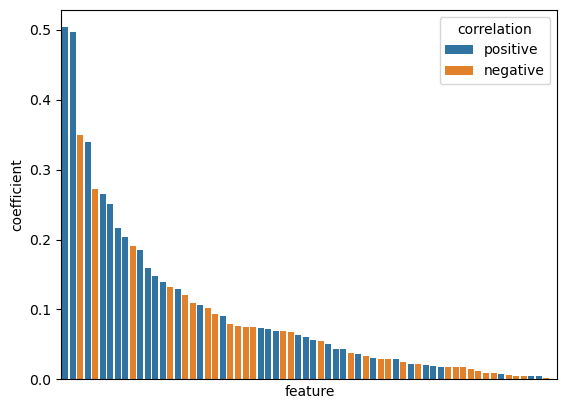

In [1172]:
sns.barplot(data = coefficient_table, x = "feature", y = "coefficient", hue="correlation")
plt.xticks([])
plt.show()

### Model Assumptions

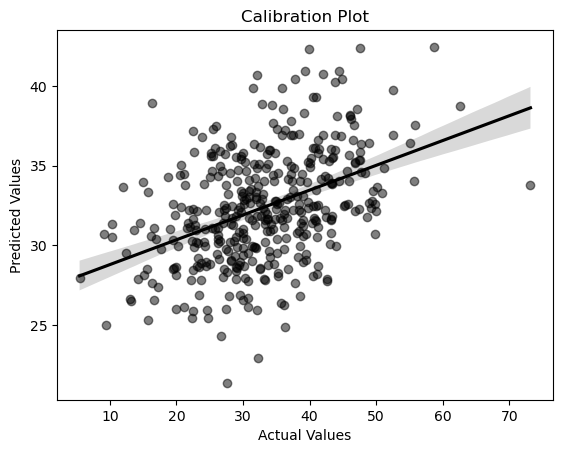

In [1154]:
#plt.scatter(X_train, y_train_bc, color='blue', label='Actual data')
sns.regplot(x=y_valid, y=y_pred, color='black', scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Calibration Plot')
plt.show()

In [1142]:
r2_score(y_valid, y_pred)

0.1720133387255326

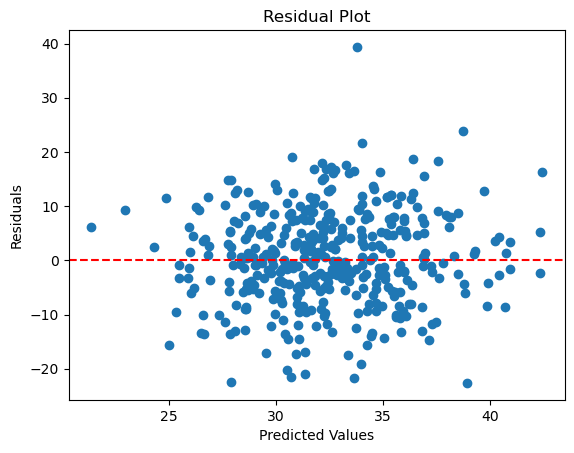

In [1155]:
residuals = y_valid - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

There does not appear to be any problems with non-linearity or heteroscedasticity.

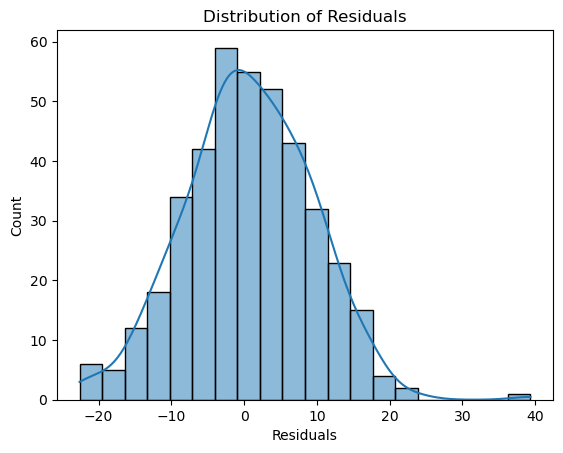

In [1157]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

The residuals are approximately normally distributed.

## Fit Model on Test Set

I am creating a second pipeline to test more hyperparameters. I am only testing Ridge regression here, because it was determined to be the best model previously.

In [1215]:
# Create pipeline
pipe_2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())  # Placeholder, will be overridden by param_grid
])

params_2 = [
    {
        "poly_features__degree": [1, 2],
        "model": [Ridge()],
        "model__alpha": np.linspace(200, 1500, 50) # values based on optimal alpha last time
    }
]

In [1216]:
grid_2 = GridSearchCV(pipe_2, params_2, cv=tscv, scoring=scoring, refit="RMSE", n_jobs=-1, verbose=2)

In [1217]:
grid_2.fit(X_train, y_train_bc)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False,
                                                           interaction_only=True)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [Ridge()],
                          'model__alpha': array([ 200.        ,  226.53061224,  253.06122449,  279.591...
       1473.46938776, 1500.        ]),
                          'poly_features__degree': [1, 2]}],
             refit='RMSE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict')},
             verbose=2)

In [1224]:
cv_scores_2 = pd.DataFrame(grid_2.cv_results_)[[
    "mean_test_MAE", "mean_test_RMSE", "mean_test_MAPE", 
    "std_test_MAE", "std_test_RMSE", "std_test_MAPE"
]]
cv_scores_2.sort_values(by="mean_test_RMSE", ascending=False).head(1)

,mean_test_MAE,mean_test_RMSE,mean_test_MAPE,std_test_MAE,std_test_RMSE,std_test_MAPE
16,-2.197864,-2.817279,-0.169976,0.065721,0.119519,0.005501


In [1223]:
print(grid_2.best_params_)

{'model': Ridge(), 'model__alpha': 412.2448979591837, 'poly_features__degree': 1}


## Model Evaluation on Test Set

In [1225]:
best_model_2 = grid_2.best_estimator_

y_pred_bc_2 = best_model_2.predict(X_test)
y_pred_2 = inv_boxcox(y_pred_bc_2, lambda_optimal)

In [1226]:
print("Test error for best model:")
evaluate(y_test, y_pred_2)

Test error for best model:


{'MAE': 6.8465, 'RMSE': 8.5266, 'MAPE': 0.2229}

These error metrics are even better than those for the validation set.

In [1227]:
y_pred_train_bc_2 = best_model_2.predict(X_train)
y_pred_train_2 = inv_boxcox(y_pred_train_bc_2, lambda_optimal)

print("Training error for best model:")
evaluate(y_train, y_pred_train_2)

Training error for best model:


{'MAE': 6.3293, 'RMSE': 8.1248, 'MAPE': 0.2203}

Since training error is only slightly less than test error, the model generalizes well.

### Feature Importance for Test Set

In [1235]:
coefficient_table_2 = pd.DataFrame({"feature": X_test.columns, "coefficient":best_model_2.named_steps['model'].coef_}).sort_values(by="coefficient" , ascending=False)

In [1236]:
coefficient_table_2["correlation"] = coefficient_table_2["coefficient"].apply(classify_correlation)
coefficient_table_2["coefficient"] = coefficient_table_2["coefficient"].abs()
coefficient_table_2 = coefficient_table_2.sort_values(by="coefficient", ascending=False)
coefficient_table_2

,feature,coefficient,correlation
12,marketing_spend_usd,0.530775,positive
4,is_ip,0.524393,positive
17,competition_titles_in_window,0.370933,negative
13,homepage_hero_share,0.359296,positive
28,primary_genre_drama,0.305742,negative
...,...,...,...
42,language_original_portuguese,0.004660,positive
53,country_cluster_JP,0.004124,negative
34,primary_genre_thriller,0.003173,negative
40,language_original_japanese,0.002765,negative


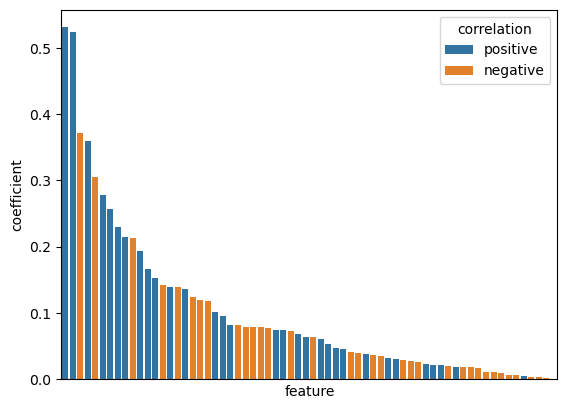

In [1237]:
sns.barplot(data = coefficient_table_2, x = "feature", y = "coefficient", hue="correlation")
plt.xticks([])
plt.show()

## Conclusion

The best model was a Ridge regression with an alpha of 412.245 and no polynomial features. The model does not overfit or underfit, and the model generalizes well. The test error for the model is {'MAE': 6.8465, 'RMSE': 8.5266, 'MAPE': 0.2229}. This is better than the baseline error, which is {'MAE': 7.889, 'RMSE': 9.7481, 'MAPE': 0.2698}. The five most important features that impact `opening_week_member_hours_mm` are `marketing_spend_usd`, `is_ip`, `competition_titles_in_window`, `homepage_hero_share`, and `primary_genre_drama`. The features `competition_titles_in_window` and `primary_genre_drama` have a negative correlation with `opening_week_member_hours_mm`.